In [13]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform, io
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [3]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

<IPython.core.display.Javascript object>


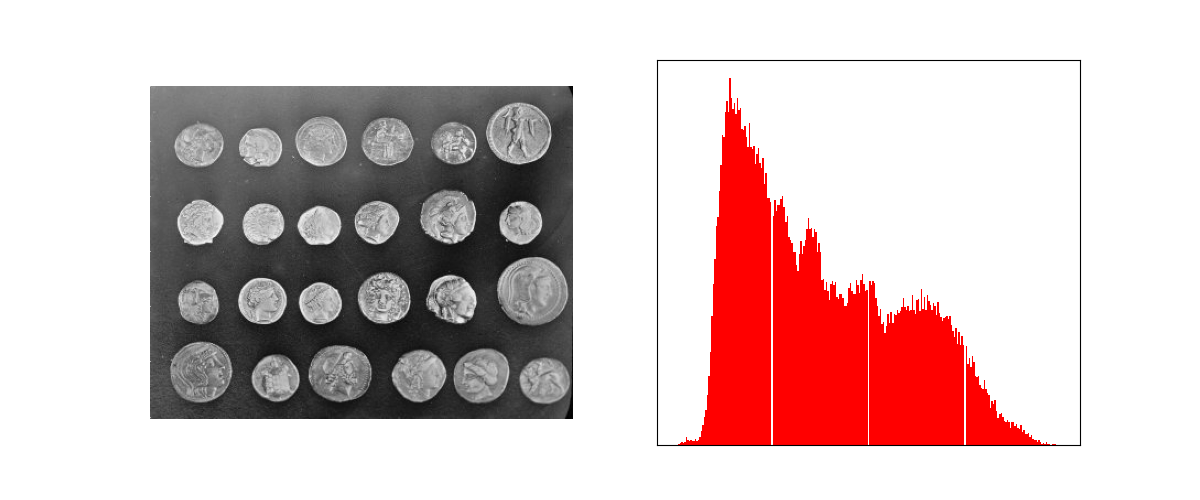

Text(0, 0.5, 'Pixel count ')

In [4]:
image = data.coins()
plt.figure(figsize=(12, 5))
plt.subplot(121)
ax1=plt.subplot(121, frameon=False)
ax1.imshow(image,cmap='gray')
ax1.set_title("Coins grayscale image")
ax2 = plt.subplot(1,2,2)
raveled_image = image.ravel()
reshaped_image = np.reshape(image,(image.shape[0]*image.shape[1],))
pt1 = ax2.hist(reshaped_image, bins=255, histtype='bar', color='red')
ax2.set_title("Jasovy histogram")
ax2.set_xlabel("Pixel intensity")
ax2.set_ylabel("Pixel count ")

<IPython.core.display.Javascript object>


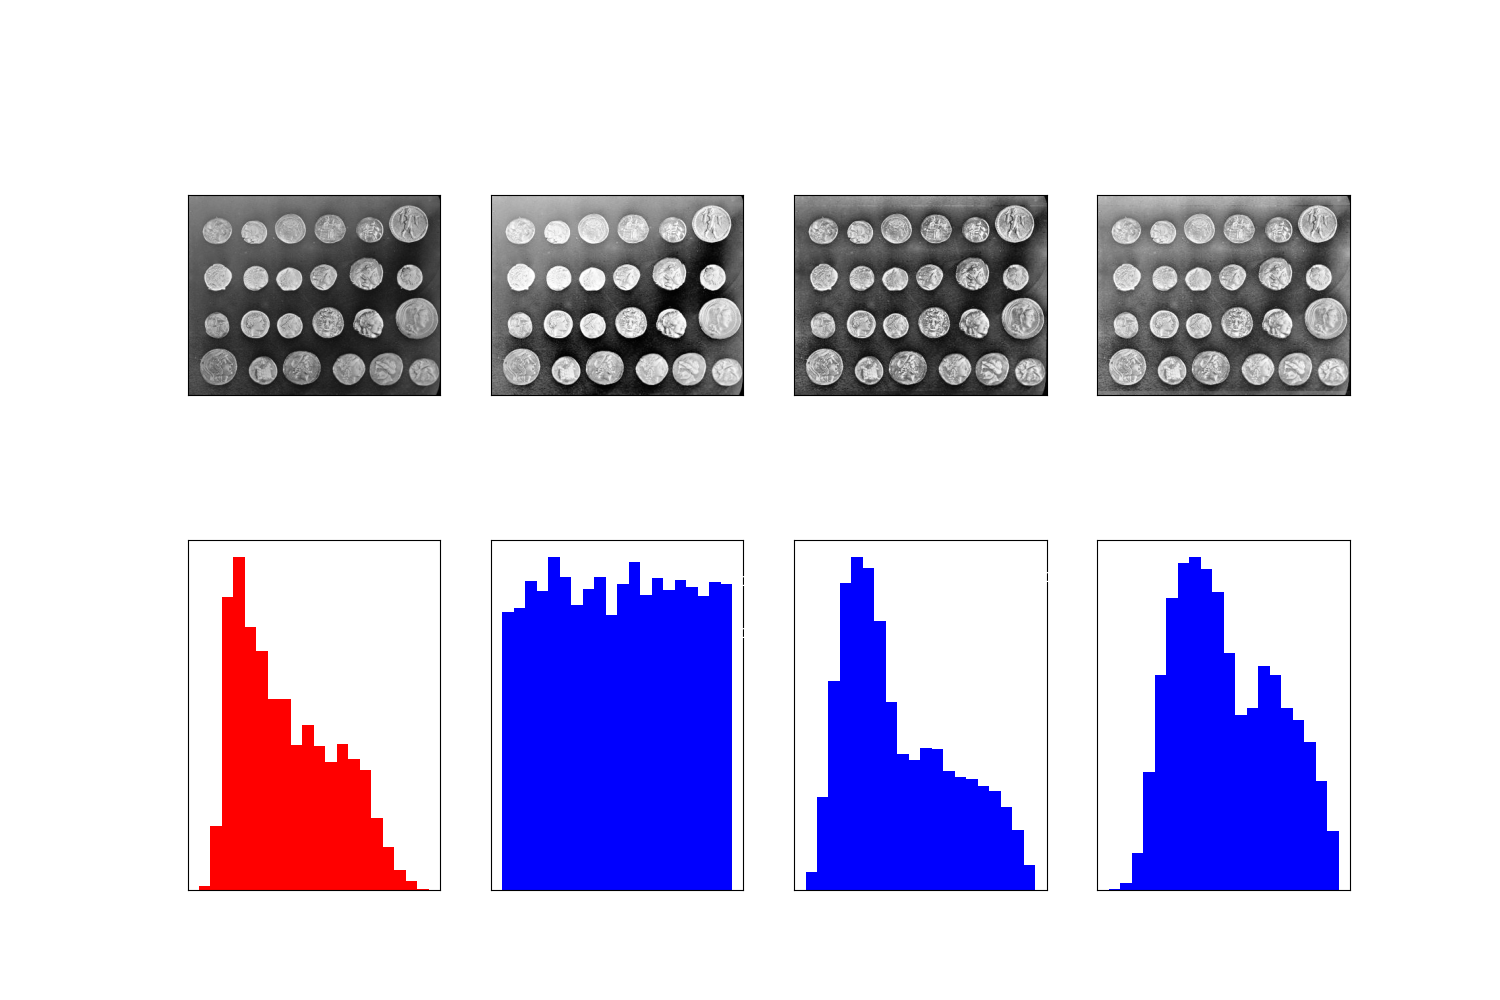

Text(0.5, 1.0, 'Contrast adjust')

In [5]:
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2,4),dtype=np.object)
axes[0,0] = plt.subplot(2, 4, 1)
axes[0,1] = plt.subplot(2, 4, 2)
axes[0,2] = plt.subplot(2, 4, 3)
axes[0,3] = plt.subplot(2, 4, 4)
axes[1,0] = plt.subplot(2, 4, 5)
axes[1,1] = plt.subplot(2, 4, 6)
axes[1,2] = plt.subplot(2, 4, 7)
axes[1,3] = plt.subplot(2, 4, 8)

axes[0,0].imshow(image,cmap='gray')
axes[1,0].hist(image.ravel(), bins=20, histtype='bar', color='red')
axes[0,0].set_title("Original image")

img_eq = exposure.equalize_hist(image)
axes[0,1].imshow(img_eq,cmap='gray')
axes[1,1].hist(img_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[0,1].set_title("Equalizing histogram adjust")

img_adapt_eq = exposure.equalize_adapthist(image)
axes[0,2].imshow(img_adapt_eq,cmap='gray')
axes[1,2].hist(img_adapt_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[0,2].set_title("Adaptive histogram adjust")

img_contrast_enhanced = exposure.equalize_adapthist(exposure.adjust_gamma(image, 0.5))
axes[0,3].imshow(img_contrast_enhanced,cmap='gray')
axes[1,3].hist(img_contrast_enhanced.ravel(), bins=20, histtype='bar', color='blue')
axes[0,3].set_title("Contrast adjust")

<IPython.core.display.Javascript object>


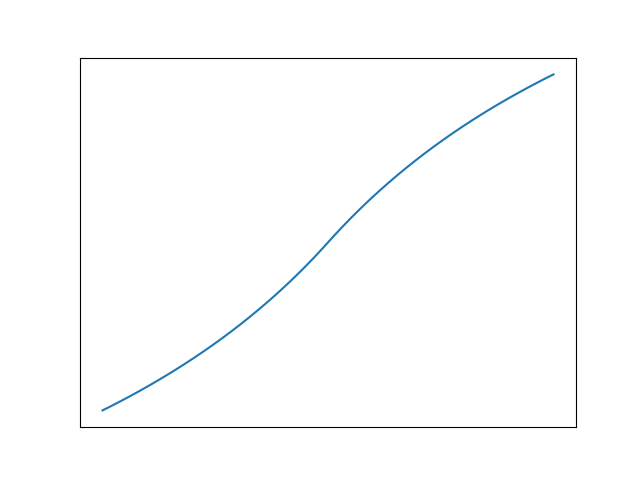

<IPython.core.display.Javascript object>


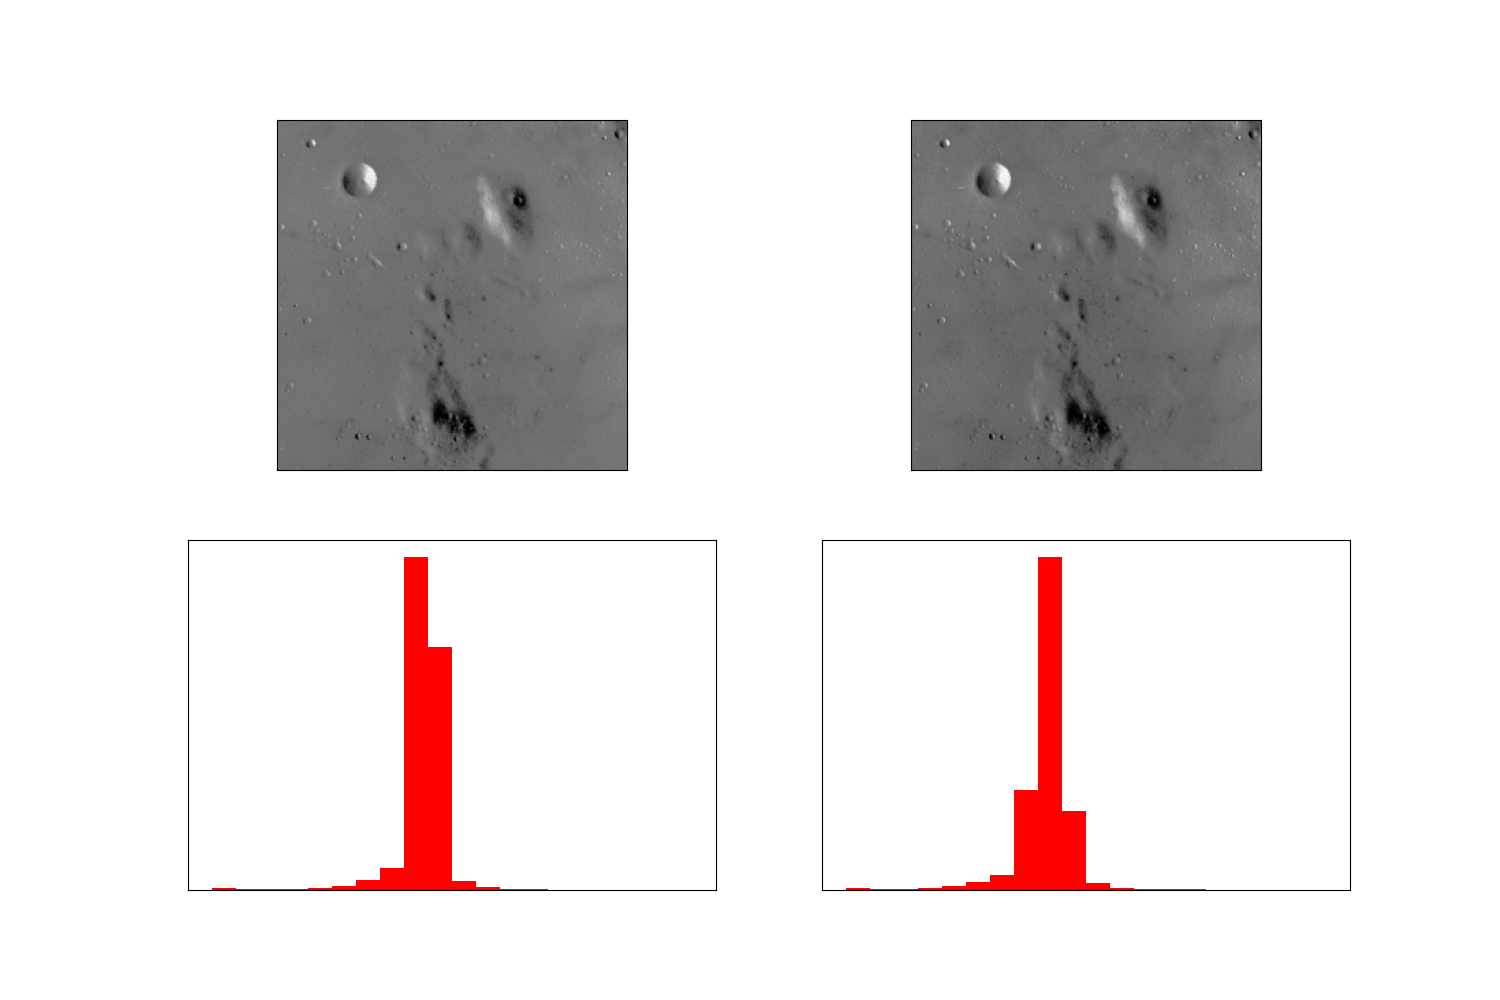

(array([8.32000e+02, 6.92000e+02, 6.84000e+02, 8.00000e+02, 1.80000e+03,
        3.56000e+03, 6.97200e+03, 4.69000e+04, 1.56564e+05, 3.71520e+04,
        3.11600e+03, 9.16000e+02, 6.96000e+02, 4.96000e+02, 3.12000e+02,
        1.84000e+02, 9.60000e+01, 9.60000e+01, 1.64000e+02, 1.12000e+02]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <a list of 20 Patch objects>)

In [12]:
x = np.linspace(0,1,50)
p = 1
c = (0.5*p)/(1+0.5*p)
plt.figure()
y= (((x-0.5)*p)/(1+abs((x-0.5)*p))+c)/(2*c)
plt.plot(x,y)
plt.title('Uprava jasovej stupnice')
plt.xlabel('vstupny jas')
plt.ylabel('out jas')

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(data.moon(),cmap='gray')
plt.subplot(222)
im = data.moon()/255
adj_im = (((im-0.5)*p)/(1+abs((im-0.5)*p))+c)/(2*c)
plt.imshow(adj_im,cmap='gray')
plt.subplot(223)
plt.hist(data.moon().ravel(), bins=20, histtype='bar', color='red')
plt.subplot(224)
plt.hist((adj_im*255).ravel(), bins=20, histtype='bar', color='red')

<IPython.core.display.Javascript object>


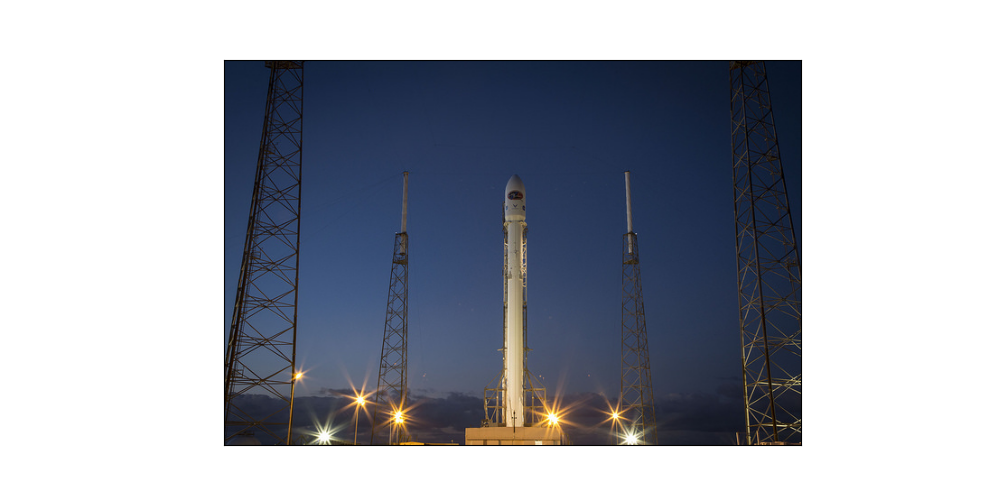

<IPython.core.display.Javascript object>


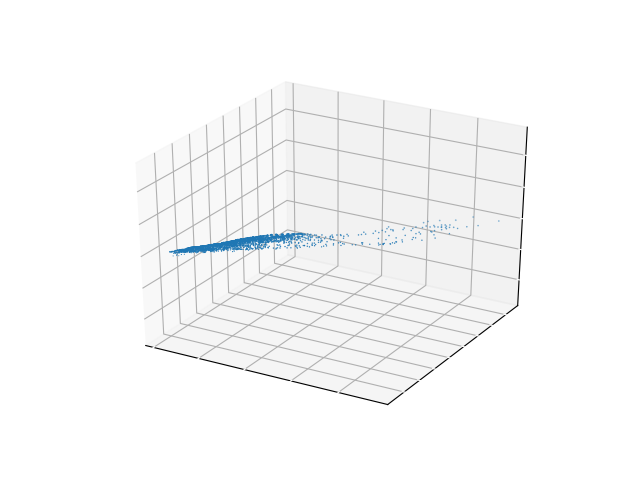

In [10]:
shape = np.floor(np.asarray(data.rocket().shape[0:2])/10).astype(dtype=np.int)
shape = np.hstack((shape, 3))
im =  transform.resize(data.rocket(),shape)
plt.figure(figsize=(10, 5))
plt.imshow(data.rocket())
plt.figure()
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]
ax = plt.axes(projection='3d')
plt.scatter(r.ravel(),g.ravel(),b.ravel(), cmap='viridis', linewidth=0.5)

# Bonus
#1. Vypoctajte kolko roznych histogramov existuje pre sedotonovy obrazok (0-255) s rozmermi h * w (+2b)

#2. Do dalsieho cvika JE mozne interaktivne pracovat s plotmi v ipythone teda v notebooku? Najdite opitmalnu kniznicu na interakciu v pythone.
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# https://matplotlib.org/3.3.1/users/interactive.html
# https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook
# Za dobre porovnanie 3 kniznic v 2D a 3D aj s  videom a komentarom (+5b)

# Povinne
# Dokoncit cvicenie 1:1 podobat na to co je v knihe.

<IPython.core.display.Javascript object>


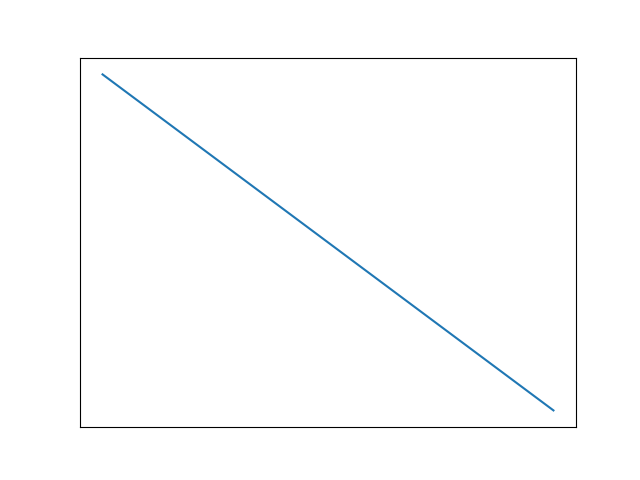

<IPython.core.display.Javascript object>


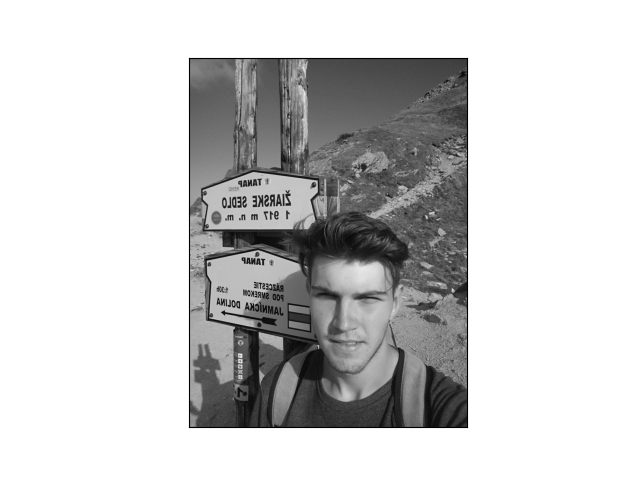

<IPython.core.display.Javascript object>


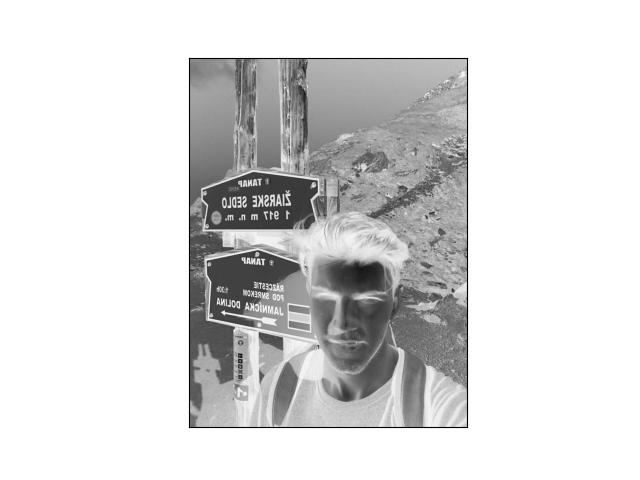

In [39]:
image = io.imread('asd.jpg', as_gray=True) / 255
x = np.linspace(0,1,50)
y = 1 - x
p = 5
c = (0.5*p)/(1+0.5*p);
negativeImage = 1 - image
plt.figure()
plt.plot(x,y)
plt.figure()
plt.imshow(image,cmap='gray')
plt.figure()
plt.imshow(negativeImage,cmap='gray')
